# The Battle of Neighborhoods

#### In this notebook we will be exploring the medical facilities in the city of brooklyn in NY.

## Introduction / Business problem

### Background

I am a Data Scientist who lives currently in Algienrs, Algeria. I have been given the chance to work as a consultant in a new medical center in New York who are willing to invest and open multiple facilities in the city of Brooklyn

### Problem to solve

The new medical firm is willing to open new facilities, but in order to increase te profits, my job was to find the best neighborhoods in the city so that the firm can benifit from those locations as the new facilities locations.



## Data

* In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains all the neighborhoods that exist in Brooklyn as well as the the latitude and logitude coordinates of each neighborhood.
* The data was given by the IBM instructors.

## Importing the relevant libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import matplotlib
import matplotlib.pyplot as plt

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          98 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0



geopy-2.1.0          | 64 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

## Download and Explore Dataset

In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

## Load and explore the data

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


## get the latitude and longitude values of New York City.

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [10]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.6501038, -73.9495823.


In [13]:
# create map of Manhattan using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [14]:
CLIENT_ID = 'EMR4JP0JH1DBID3WWOB5RGOO3GM4OOIEKCW5CCFB2D3CVA4Q' # your Foursquare ID
CLIENT_SECRET = 'MJJHFANTW45ZVMN2OBOYLNOTTG00JXBDK2JZA4IGEWQDB2ZI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EMR4JP0JH1DBID3WWOB5RGOO3GM4OOIEKCW5CCFB2D3CVA4Q
CLIENT_SECRET:MJJHFANTW45ZVMN2OBOYLNOTTG00JXBDK2JZA4IGEWQDB2ZI


In [15]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

In [16]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [42]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = "4bf58dd8d48988d104941735"
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT,
    categoryId)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=EMR4JP0JH1DBID3WWOB5RGOO3GM4OOIEKCW5CCFB2D3CVA4Q&client_secret=MJJHFANTW45ZVMN2OBOYLNOTTG00JXBDK2JZA4IGEWQDB2ZI&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100&categoryId=4bf58dd8d48988d104941735'

In [43]:
results = requests.get(url).json()

In [44]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,The Treat and Release Center,Medical Center,40.627569,-74.029421
1,Jana Health Care,Medical Center,40.623260,-74.030501
2,"NY Center for Ear, Nose,Throat, Sinus & Allergy",Doctor's Office,40.624345,-74.030657
3,"Jeffrey Hyman, MD",Doctor's Office,40.627567,-74.029724
4,"Stephen Thomas Mastrianni, DO",Doctor's Office,40.627567,-74.029724


In [46]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

54 venues were returned by Foursquare.


In [47]:
nearby_venues['categories'].value_counts()

Doctor's Office            21
Dentist's Office            9
Eye Doctor                  4
Chiropractor                4
Medical Center              3
Hospital                    2
Alternative Healer          2
Physical Therapist          2
Urgent Care Center          1
Weight Loss Center          1
Health & Beauty Service     1
Pharmacy                    1
Mental Health Office        1
Veterinarian                1
Mobile Phone Shop           1
Name: categories, dtype: int64

## Explore Neighborhoods in Brooklyn

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        categoryId = "4bf58dd8d48988d104941735"
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
# type your answer here
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [51]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(1492, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,The Treat and Release Center,40.627569,-74.029421,Medical Center
1,Bay Ridge,40.625801,-74.030621,Jana Health Care,40.623260,-74.030501,Medical Center
2,Bay Ridge,40.625801,-74.030621,"NY Center for Ear, Nose,Throat, Sinus & Allergy",40.624345,-74.030657,Doctor's Office
3,Bay Ridge,40.625801,-74.030621,"Jeffrey Hyman, MD",40.627567,-74.029724,Doctor's Office
4,Bay Ridge,40.625801,-74.030621,"Stephen Thomas Mastrianni, DO",40.627567,-74.029724,Doctor's Office


In [52]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,46,46,46,46,46,46
Bay Ridge,54,54,54,54,54,54
Bedford Stuyvesant,5,5,5,5,5,5
Bensonhurst,32,32,32,32,32,32
Boerum Hill,51,51,51,51,51,51
Borough Park,28,28,28,28,28,28
Brighton Beach,40,40,40,40,40,40
Broadway Junction,6,6,6,6,6,6
Brooklyn Heights,100,100,100,100,100,100


In [53]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 33 uniques categories.


## Analyze Each Neighborhood

In [54]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]
print(brooklyn_onehot.shape)
brooklyn_onehot.head()

(1492, 34)


,Neighborhood,Acupuncturist,Alternative Healer,Building,Business Service,Chiropractor,Dentist's Office,Doctor's Office,Emergency Room,Event Space,Eye Doctor,Financial or Legal Service,Gym / Fitness Center,Health & Beauty Service,Home Service,Hospital,Hospital Ward,Language School,Massage Studio,Maternity Clinic,Medical Center,Medical Lab,Mental Health Office,Mobile Phone Shop,Nutritionist,Optical Shop,Pharmacy,Physical Therapist,Rehab Center,Research Laboratory,Spa,Urgent Care Center,Veterinarian,Weight Loss Center
0,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bay Ridge,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bay Ridge,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bay Ridge,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
print(brooklyn_grouped.shape)
brooklyn_grouped.head()

(65, 34)


,Neighborhood,Acupuncturist,Alternative Healer,Building,Business Service,Chiropractor,Dentist's Office,Doctor's Office,Emergency Room,Event Space,Eye Doctor,Financial or Legal Service,Gym / Fitness Center,Health & Beauty Service,Home Service,Hospital,Hospital Ward,Language School,Massage Studio,Maternity Clinic,Medical Center,Medical Lab,Mental Health Office,Mobile Phone Shop,Nutritionist,Optical Shop,Pharmacy,Physical Therapist,Rehab Center,Research Laboratory,Spa,Urgent Care Center,Veterinarian,Weight Loss Center
0,Bath Beach,0.043478,0.000000,0.0,0.0,0.000000,0.195652,0.347826,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.043478,0.0,0.0,0.0,0.0,0.217391,0.021739,0.000000,0.000000,0.0,0.000000,0.000000,0.021739,0.0,0.0,0.0,0.000000,0.108696,0.000000
1,Bay Ridge,0.000000,0.037037,0.0,0.0,0.074074,0.166667,0.388889,0.0,0.0,0.074074,0.0,0.0,0.018519,0.0,0.037037,0.0,0.0,0.0,0.0,0.055556,0.000000,0.018519,0.018519,0.0,0.000000,0.018519,0.037037,0.0,0.0,0.0,0.018519,0.018519,0.018519
2,Bedford Stuyvesant,0.200000,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.600000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,Bensonhurst,0.000000,0.000000,0.0,0.0,0.031250,0.093750,0.687500,0.0,0.0,0.031250,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.062500,0.000000,0.031250,0.000000,0.0,0.000000,0.000000,0.031250,0.0,0.0,0.0,0.000000,0.031250,0.000000
4,Boerum Hill,0.039216,0.019608,0.0,0.0,0.000000,0.176471,0.313725,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.039216,0.0,0.0,0.0,0.0,0.215686,0.039216,0.000000,0.000000,0.0,0.019608,0.000000,0.039216,0.0,0.0,0.0,0.000000,0.078431,0.019608


In [56]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Bath Beach,Doctor's Office,Medical Center,Dentist's Office
1,Bay Ridge,Doctor's Office,Dentist's Office,Eye Doctor
2,Bedford Stuyvesant,Medical Center,Acupuncturist,Doctor's Office
3,Bensonhurst,Doctor's Office,Dentist's Office,Medical Center
4,Boerum Hill,Doctor's Office,Medical Center,Dentist's Office


## Cluster Neighborhoods

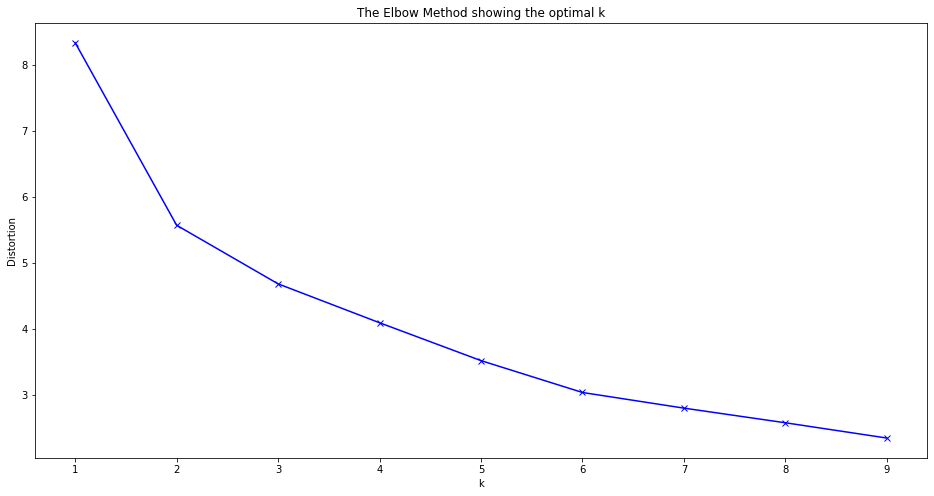

In [59]:
import matplotlib.pyplot as plt
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=23)
    kmeanModel.fit(brooklyn_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=23).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 2, 1, 3, 1, 3, 3, 1, 2], dtype=int32)

In [61]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.dropna(axis=0, inplace = True)
brooklyn_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,3.0,Doctor's Office,Dentist's Office,Eye Doctor
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1.0,Doctor's Office,Dentist's Office,Medical Center
2,Brooklyn,Sunset Park,40.645103,-74.010316,0.0,Dentist's Office,Medical Center,Doctor's Office
3,Brooklyn,Greenpoint,40.730201,-73.954241,3.0,Doctor's Office,Dentist's Office,Medical Lab
4,Brooklyn,Gravesend,40.595260,-73.973471,0.0,Dentist's Office,Doctor's Office,Veterinarian
5,Brooklyn,Brighton Beach,40.576825,-73.965094,3.0,Doctor's Office,Dentist's Office,Medical Center
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,1.0,Doctor's Office,Medical Center,Hospital
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,3.0,Doctor's Office,Dentist's Office,Medical Center
8,Brooklyn,Flatbush,40.636326,-73.958401,3.0,Doctor's Office,Medical Center,Medical Lab
9,Brooklyn,Crown Heights,40.670829,-73.943291,1.0,Doctor's Office,Dentist's Office,Medical Center


In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [64]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,Sunset Park,Dentist's Office,Medical Center,Doctor's Office
4,Gravesend,Dentist's Office,Doctor's Office,Veterinarian
10,East Flatbush,Dentist's Office,Doctor's Office,Weight Loss Center
11,Kensington,Medical Center,Dentist's Office,Doctor's Office
22,Gowanus,Dentist's Office,Veterinarian,Medical Center
27,Starrett City,Dentist's Office,Doctor's Office,Weight Loss Center
38,Clinton Hill,Dentist's Office,Medical Center,Language School
56,Rugby,Medical Center,Dentist's Office,Doctor's Office
67,Highland Park,Dentist's Office,Doctor's Office,Hospital
69,Erasmus,Dentist's Office,Medical Center,Doctor's Office


In [65]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Bensonhurst,Doctor's Office,Dentist's Office,Medical Center
6,Sheepshead Bay,Doctor's Office,Medical Center,Hospital
9,Crown Heights,Doctor's Office,Dentist's Office,Medical Center
12,Windsor Terrace,Doctor's Office,Medical Center,Dentist's Office
18,Brooklyn Heights,Doctor's Office,Medical Center,Optical Shop
24,Park Slope,Doctor's Office,Dentist's Office,Medical Center
26,East New York,Doctor's Office,Weight Loss Center,Hospital Ward
28,Canarsie,Doctor's Office,Weight Loss Center,Hospital Ward
29,Flatlands,Doctor's Office,Veterinarian,Dentist's Office
34,Borough Park,Doctor's Office,Dentist's Office,Medical Center


In [66]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
14,Brownsville,Medical Center,Dentist's Office,Eye Doctor
17,Bedford Stuyvesant,Medical Center,Acupuncturist,Doctor's Office
63,Weeksville,Hospital,Medical Center,Event Space


In [67]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Bay Ridge,Doctor's Office,Dentist's Office,Eye Doctor
3,Greenpoint,Doctor's Office,Dentist's Office,Medical Lab
5,Brighton Beach,Doctor's Office,Dentist's Office,Medical Center
7,Manhattan Terrace,Doctor's Office,Dentist's Office,Medical Center
8,Flatbush,Doctor's Office,Medical Center,Medical Lab
13,Prospect Heights,Doctor's Office,Medical Center,Dentist's Office
15,Williamsburg,Doctor's Office,Dentist's Office,Medical Center
16,Bushwick,Doctor's Office,Dentist's Office,Hospital
19,Cobble Hill,Doctor's Office,Medical Center,Dentist's Office
20,Carroll Gardens,Doctor's Office,Dentist's Office,Medical Center


In [68]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
62,Vinegar Hill,Physical Therapist,Mental Health Office,Weight Loss Center
